<a href="https://colab.research.google.com/github/ShinAsakawa/ShinAsakawa.github.io/blob/master/notebooks/2021_0606Mizuno_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 水野+ (2011) 日本語の連想頻度表

- date: 2020-0602 modified
- author: shin asakawa <sakawa@ieee.org>
- note: 水野先生のデータベース，漢字，かな，カナの表記 3 種類が別々の excel files をアップロードしないと動作しない。書籍に付属している CD-ROM は有料のため著作権上公開するのは難しいと思われる。
- title: 連想語頻度表―3モーラの漢字・ひらがな・カタカナ表記語
- author: 水野 りか, 清河 幸子, 川上 正浩, 柳谷 啓子
- year: 2011
- publisher: ナカニシヤ出版
- amazon: https://www.amazon.co.jp/dp/4779505623/


In [1]:
# The location where Excel files are
#水野エクセルファイルの場所を指定
mizuno_base = '.'

In [ ]:
import sys
import os
import numpy as np

import pandas as pd
import termcolor

import matplotlib.pyplot as plt
!pip install japanize_matplotlib
import japanize_matplotlib

#from scipy import stats  #スピアマンブラウンの順位相関係数のライブラリの読み込み
#import ja_util

In [ ]:
#このセルは Colab 用のコード
##形態素分析ライブラリーMeCab と 辞書(mecab-ipadic-NEologd)のインストール 
##reference: https://qiita.com/jun40vn/items/78e33e29dce3d50c2df1
!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n
!pip install mecab-python3

# シンボリックリンクによるエラー回避
!ln -s /etc/mecabrc /usr/local/etc/mecabrc

#訓練済 word2vec ファイルの取得
##!wget --no-check-certificate --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1B9HGhLZOja4Xku5c_d-kMhCXn1LBZgDb' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1B9HGhLZOja4Xku5c_d-kMhCXn1LBZgDb" -O 2021_05jawiki_hid128_win10_neg10_cbow.bin.gz && rm -rf /tmp/cookies.txt
##!wget --no-check-certificate --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1OWmFOVRC6amCxsomcRwdA6ILAA5s4y4M' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1OWmFOVRC6amCxsomcRwdA6ILAA5s4y4M" -O 2021_05jawiki_hid128_win10_neg10_sgns.bin.gz && rm -rf /tmp/cookies.txt
!wget --no-check-certificate --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1JTkU5SUBU2GkURCYeHkAWYs_Zlbqob0s' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1JTkU5SUBU2GkURCYeHkAWYs_Zlbqob0s" -O 2021_05jawiki_hid200_win20_neg20_cbow.bin.gz && rm -rf /tmp/cookies.txt
##!wget --no-check-certificate --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1VPL2Mr9JgWHik9HjRmcADoxXIdrQ3ds7' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1VPL2Mr9JgWHik9HjRmcADoxXIdrQ3ds7" -O 2021_05jawiki_hid200_win20_neg20_sgns.bin.gz && rm -rf /tmp/cookies.txt
##!wget http://www.cis.twcu.ac.jp/~asakawa/2017jpa/2021_05jawiki_hid128_win20_neg20_cbow.bin.gz

In [6]:
!wget --no-check-certificate --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1JTkU5SUBU2GkURCYeHkAWYs_Zlbqob0s' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1JTkU5SUBU2GkURCYeHkAWYs_Zlbqob0s" -O 2021_05jawiki_hid200_win20_neg20_cbow.bin.gz && rm -rf /tmp/cookies.txt


--2021-06-08 02:13:07--  https://docs.google.com/uc?export=download&confirm=EXhe&id=1JTkU5SUBU2GkURCYeHkAWYs_Zlbqob0s
Resolving docs.google.com (docs.google.com)... 142.250.153.102, 142.250.153.101, 142.250.153.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.153.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-8g-docs.googleusercontent.com/docs/securesc/nmj7ec5c60utmgsus4j74tqb0h9sjdjf/g824i226o6v4l7qf5diqd5b5danhd1cl/1623118350000/10804218431552746902/06029975331698070812Z/1JTkU5SUBU2GkURCYeHkAWYs_Zlbqob0s?e=download [following]
--2021-06-08 02:13:07--  https://doc-0o-8g-docs.googleusercontent.com/docs/securesc/nmj7ec5c60utmgsus4j74tqb0h9sjdjf/g824i226o6v4l7qf5diqd5b5danhd1cl/1623118350000/10804218431552746902/06029975331698070812Z/1JTkU5SUBU2GkURCYeHkAWYs_Zlbqob0s?e=download
Resolving doc-0o-8g-docs.googleusercontent.com (doc-0o-8g-docs.googleusercontent.com)... 108.177.119.132, 2a00:1450:4013:c00::84
Conne

In [7]:
#word2vec データのため gensim を使う
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

# word2vec データの読み込み
w2v_base = '.'
w2v_file = '2021_05jawiki_hid200_win20_neg20_cbow.bin.gz'
# word2vec データの読み込み
asakawa_w2v_file = os.path.join(w2v_base, w2v_file)
asakawa_w2v = KeyedVectors.load_word2vec_format(asakawa_w2v_file, 
                                                encoding='utf-8', 
                                                unicode_errors='replace',
                                                binary=True) 
w2v = asakawa_w2v

In [8]:
from google.colab import files
uploaded = files.upload()  # 水野エクセル 3 files (kanji, katakana, hiragana) をを指定してアップロードする

Saving katakana.xls to katakana.xls
Saving hiragana.xls to hiragana.xls
Saving kanji2.xls to kanji2.xls


In [10]:
#3つのファイルを読み，各ファイルに存在するシート名を印字
print('購入した書籍についていたエクセルファイルのうち `kanji.xls` は行末に不要な空行が付いていた。その空行を削除したファイルが `kanji2.xls` である')
[kanji, katakana, hiragana] = [pd.ExcelFile(os.path.join(mizuno_base, d + '.xls')) for d in ['kanji2', 'katakana', 'hiragana']]
print(kanji.sheet_names)
print(hiragana.sheet_names)
print(katakana.sheet_names)

#上の通り，各ファイルの最初の 3 シートはまとめである。
# 従って 4 シート目以降をを取り出す (sheet_names[3:])
#加えて，各シートの最後の一行は合計であるので，読み込まない (sheet_name=w)[w][:-1])
Kanji = {w:list(kanji.parse(sheet_name=w)[w][:-1]) for w in kanji.sheet_names[3:]}
Kata = {w:list(katakana.parse(sheet_name=w)[w][:-1]) for w in katakana.sheet_names[3:]}
Hira = {w:list(hiragana.parse(sheet_name=w)[w][:-1]) for w in hiragana.sheet_names[3:]}

購入した書籍についていたエクセルファイルのうち `kanji.xls` は行末に不要な空行が付いていた。その空行を削除したファイルが `kanji2.xls` である
['漢字まとめ', '漢字まとめ_複数表記列挙', '連想強度範囲内抽出', '赤字', '悪魔', '育児', '田舎', '移民', '映画', '英語', '汚染', '親子', '絵画', '会議', '介護', '価格', '科学', '火災', '家族', '活字', '家庭', '画面', '看護', '管理', '記憶', '気温', '機械', '危険', '犠牲', '季節', '着物', '議論', '勤務', '空気', '苦労', '検査', '権利', '講義', '国語', '個人', '古典', '言葉', '雇用', '娯楽', '財布', '散歩', '資格', '時間', '刺激', '試験', '資源', '思考', '仕事', '自信', '視線', '自然', '時代', '資本', '市民', '指紋', '自由', '深夜', '心理', '神話', '数字', '頭脳', '政治', '世界', '石油', '世代', '線路', '素材', '対話', '知識', '手紙', '電気', '電池', '電話', '道具', '道路', '都会', '時計', '名前', '夫婦', '福祉', '腐敗', '文化', '弁護', '帽子', '保存', '未来', '名刺', '名簿', '野菜', '幼児', '預金', '予算', '世論', '理解', '歴史', '録画', '論理', '話題']
['ひらがなまとめ', 'ひらがなまとめ_複数表記列挙', '連想強度範囲内抽出', 'あくび', 'あぐら', 'あそび', 'あたま', 'いかだ', 'いとこ', 'いのち', 'いるか', 'いろり', 'いわし', 'うどん', 'うろこ', 'うわさ', 'えくぼ', 'えほん', 'おかず', 'おじぎ', 'おとこ', 'おどり', 'おなか', 'おばけ', 'おまけ', 'おむつ', 'おやつ', 'おんな', 'おんぶ', 'かかと', 'かたち', 'かばん', 'からす', 'からだ', 'きずな', 'きのこ', 'くさ

In [11]:
print('# 水野連想強度が word2vec のコサイン類似度の何番目に現れるか？')
print('# 水野目標語(S)と想起語(R)とをエクセルファイルから読み込んで Miz_SRdict に読み込む..')
Miz_SRdict = {}

all_human_words = []
#machines, humans = [], []

#水野連想語が word2vec で何番目に当たるかを集計するための変数
top1, top10, top100, over100, ng = [], [], [], [], []

for D, Excel in zip(['Kanji', 'Kata', 'Hira'], ['kanji', 'katakana', 'hiragana']):
    for target in list(eval(D)):
        if not target in w2v:
            print(termcolor.colored(f'目標語:{target} は word2vec に存在せず                   ', 'green'))
            continue
        else:
            Miz_SRdict[target] = {}
            
        #エクセルファイルのシートからデータを pandas dataframe に読み込み
        mizuno_df = eval(Excel).parse(sheet_name=target)         
        
        #最終行は合計なので読み込まない
        mizuno_words = list(mizuno_df[target])[:-1]
        
        # データ配列を用意
        mizuno_vals = np.array(list(mizuno_df['連想強度'])[:-1])

        # 単語と連想強度の数が不一致の場合があるのでその対処
        l_words = len(mizuno_words)
        l_vals = len(mizuno_vals)
        length = l_words if l_words < l_vals else l_vals
        
        w2v_sims = [x[0] for x in w2v.most_similar(target,topn=50000)]
        mizuno_top = mizuno_words[0]
        
        #水野連想語データの最上位語 topn=1 が word2vec で何番目になるかを集計
        if mizuno_top in w2v_sims:
            rank = w2v_sims.index(mizuno_top) + 1
            if rank == 1:
                top1.append([target,mizuno_top])
            elif rank <= 10:
                top10.append([target, mizuno_top])
            elif rank <= 100:
                top100.append([target, mizuno_top])
            else:
                over100.append([target, mizuno_top])
            print(f'目標語:{target}, 水野1位想起語:{mizuno_top}, word2vec 順位 {w2v_sims.index(mizuno_top)+1} word2vec 上位語:{w2v_sims[:5]}')
        else:
            ng.append([target, mizuno_top])
            print(termcolor.colored('NG:{3} 目標語:{0} 水野想起1位:{1} word2vec 類似語上位に存在せず，word2vec 上位語:{2}'.format(
                target, mizuno_top, w2v_sims[:7], len(ng)), 'red'))

        #水野連想語の全て単語を all_words に append する
        for i in range(length):
            word = mizuno_words[i]
            if word in w2v:
                all_human_words.append(word)
                print(f'i:{i+1}, target:{target}, word:{word}', end='         \r')
                Miz_SRdict[target][word] = {'水野連想強度': float(mizuno_vals[mizuno_words.index(word)]),
                                            'w2v コサイン類似度': w2v.similarity(target, word)}

        i += 1


#集計結果の印字
print('\n集計結果')
sum = 0
for rank in ['top1', 'top10', 'top100', 'over100', 'ng']:
    print(f'{rank:>7s}: {len(eval(rank)):>3d} {len(eval(rank))/296:.3f} {sorted(eval(rank))[-5:]}')
    sum += len(eval(rank))
print(f'水野連想語 目標語 総数 :{sum} 語')    
    
#全単語をユニークな集合に変換
all_human_words = sorted(list(set(all_human_words)))[::-1]        
print(f'水野連想語 ユニークな単語総数: {len(all_human_words)} 語')
print(f'水野連想語 リスト先頭 10 語: {all_human_words[:10]}')
print(f'水野連想語 リスト後尾 10 語: {all_human_words[-10:]}')


# 水野連想強度が word2vec のコサイン類似度の何番目に現れるか？
# 水野目標語(S)と想起語(R)とをエクセルファイルから読み込んで Miz_SRdict に読み込む..
目標語:赤字, 水野1位想起語:黒字, word2vec 順位 1 word2vec 上位語:['黒字', '経常', '赤字経営', '計上', '債務超過']
目標語:悪魔, 水野1位想起語:天使, word2vec 順位 4 word2vec 上位語:['邪悪', '悪霊', 'サタン', '天使', 'ルシファー']
目標語:育児, 水野1位想起語:こども, word2vec 順位 865 word2vec 上位語:['子育て', '保育', '出産後', '家事', '出産']
NG:1 目標語:田舎 水野想起1位:たんぼ word2vec 類似語上位に存在せず，word2vec 上位語:['都会', '田舎町', '片田舎', '貧乏', '田舎暮らし', '都会人', '侘しく']
目標語:移民, 水野1位想起語:アメリカ, word2vec 順位 956 word2vec 上位語:['移住者', '移民2世', '中国系移民', '移住', '日系キューバ人']
目標語:映画, 水野1位想起語:映画館, word2vec 順位 9304 word2vec 上位語:['映画作品', 'ハリウッド映画', '夢みるように眠りたい', '主演映画', '霧の子午線']
NG:2 目標語:英語 水野想起1位:アメリカ word2vec 類似語上位に存在せず，word2vec 上位語:['フランス語', '日本語', 'ドイツ語', '中国語', 'イギリス英語', 'フレングリッシュ', '外国語']
目標語:汚染, 水野1位想起語:環境, word2vec 順位 828 word2vec 上位語:['汚染物質', '環境汚染', '有害物質', '廃水', '健康被害']
目標語:親子, 水野1位想起語:家族, word2vec 順位 11622 word2vec 上位語:['父子', '兄弟', '二人', '姉弟', '兄妹']
目標語:絵画, 水野1位想起語:芸術, word2vec 順位 143 word2vec 上位語:['油彩画', '油彩', '素描', '西洋

In [12]:
# 分析のためのデータ行列を作成
miz_targets = list(Miz_SRdict)    # 水野ターゲット語のリスト

# 水野ターゲット語 (296) X word2vec 次元
Miz_t = np.zeros((len(Miz_SRdict), w2v['日本語'].shape[0]), dtype=np.float32)
for i, target in enumerate(miz_targets):
    Miz_t[i] = np.copy(w2v[target])
print(f'# (水野ターゲット語数, word2vec 次元数) の行列を Miz_t, Miz_t.shape={Miz_t.shape}')

# (水野ターゲット語数, word2vec 次元数) の行列を Miz_t, Miz_t.shape=(296, 200)


In [13]:
topn = 3
print(f'#上位 topn:{topn} 連想語だけのデータを作成')
human_topn_resp_words = {}  #人間用
machine_topn_words = {}     #機械用

#人間 すなわち水野本のデータ
for target in miz_targets:
    target_id = miz_targets.index(target)
    words = list(Miz_SRdict[target].keys())[:topn]
    for word in words:
        if not word in human_topn_resp_words:
            human_topn_resp_words[word] = 1
        else:
            human_topn_resp_words[word] += 1
            
human_topn_words = sorted(list(set(human_topn_resp_words)))[::-1]
print(f'len(human_topn_words): {len(human_topn_words)}')

#機械 すなわち word2vec 
for target in miz_targets:
    target_id = miz_targets.index(target)
    
    #機械の類似語を上位 topn 語を取得
    machine_words = [x[0] for x in w2v.most_similar(target, topn=topn)]
    
    #取得した機械の類似語に対して
    for word in machine_words:
        if not word in machine_topn_words:
            machine_topn_words[word] = 1
        else:
            machine_topn_words[word] += 1
print(f'len(machine_topn_words): {len(machine_topn_words)}')

common_words = sorted(list(set(human_topn_words) | (set(machine_topn_words))))[::-1]
print(f'人間と機械の反応想起語共通語のリスト common_words の単語数: {len(common_words)}')
print(f'人間と機械との上位 {topn} 語の総語数: {len(common_words)}')
print(f'人間と機械との上位 {topn} 語の共通語彙数: {len(set(human_topn_words) & (set(machine_topn_words)))}',end=' ')
#print(sorted(list(set(human_topn_words) & (set(machine_topn_words))))[::-1])
print()
print(f'#水野データの総数が，漢字，カタカナ，ひらがな，各 100 語で，そこから {len(miz_targets)} 語だけを用いた')
print(f'#単純に {topn} 語が全く異なると考えると総語彙数は {len(miz_targets) * topn} 語である。')

machine_topn_sim_words = sorted(list(set(machine_topn_words)))[::-1]
print(f'len(machine_topn_sim_words):{len(machine_topn_words)}')

#上位 topn:3 連想語だけのデータを作成
len(human_topn_words): 624
len(machine_topn_words): 868
人間と機械の反応想起語共通語のリスト common_words の単語数: 1452
人間と機械との上位 3 語の総語数: 1452
人間と機械との上位 3 語の共通語彙数: 40 
#水野データの総数が，漢字，カタカナ，ひらがな，各 100 語で，そこから 296 語だけを用いた
#単純に 3 語が全く異なると考えると総語彙数は 888 語である。
len(machine_topn_sim_words):868


In [14]:
#人間と機械の連想語に現れる単語をすべて合わせて HM とする
def make_human_and_machine_free_assciation_matrix(miz_targets, common_words, print_flag=False):
    HM = np.zeros((len(miz_targets), len(common_words)), dtype=np.float32)
    id_counter = np.zeros((len(common_words)), dtype=np.uint8)

    for i, target in enumerate(miz_targets):
        human_words = list(Miz_SRdict[target].keys())[:topn]
        machine_words = [word[0] for word in w2v.most_similar(target, topn=topn)]
    
        print(f'{i:>3d} {target}', end=': ') if print_flag else None
        for word in human_words:  #人間用
            word_idx = common_words.index(word)
            id_counter[word_idx] += 1
            HM[i][word_idx] = Miz_SRdict[target][word]["水野連想強度"]
            if print_flag:
                print(f'({word}({word_idx}),{Miz_SRdict[target][word]["水野連想強度"]:.3f})', end=" ")
    
        for word in machine_words: #機械用
            word_idx = common_words.index(word)
            id_counter[word_idx] += 1
            if print_flag:
                print(f'({word}({word_idx}),{w2v.similarity(target,word):.2f})', end=" ")
            
        print() if print_flag else None
    
    
    #最小値と最大値を計数して表示，データチェックのため
    print(id_counter.min(), id_counter.max()) if print_flag else None
    return HM

HM = make_human_and_machine_free_assciation_matrix(miz_targets, common_words)

In [16]:
def split_dataset(X, y, n_split=5):
    """データを訓練データ，検証データに分割"""
    assert X.shape[0] == y.shape[0], 'please make sure dataset X and y'
    div = X.shape[0] // n_split
    tags = np.random.permutation(np.array(range(X.shape[0]),dtype=np.uint8))
    
    #X_trains = np.zeros((n_split, div * (n_split-1), X.shape[1]), dtype=np.float32)
    #y_trains = np.zeros((n_split, div * (n_split-1), y.shape[1]), dtype=np.float32)
    #X_vals = np.zeros((n_split, div, X.shape[1]), dtype=np.float32)
    #y_vals = np.zeros((n_split, div, y.shape[1]), dtype=np.float32)

    #start, end = 0, div
    #for i, data in enumerate(range(n_split)):
    #    split = slice(start, end)
    #    X_trains[i] = X[X < start or end < X]
    #    y_trains[i] = y[y < start or end < y]
    #    X_vals[i] = X[start < X and X < end]
    #    y_vals[i] = y[start < y and y < end]
        
    train_tags = tags[:-div]
    val_tags = tags[-div:]
    X_train = X[train_tags]
    y_train = y[train_tags]
    X_val = X[val_tags]
    y_val = y[val_tags]
    return X_train, y_train, X_val, y_val, train_tags, val_tags


In [27]:
#通常のロジスティック回帰ではカテゴリ予測のため，水野連想強度の値を予測するためには使えない
#そこで自作のロジスティック回帰を実行することにする。
np.set_printoptions(suppress=False, formatter={'float': '{:5.2f}'.format})

#出力に用いる非線形関数の定義 sigmoid, tanh, ReLU
def sigmoid(x, back=False):
    """So called the sigmoid function"""
    if back:
        return (x * (1. - x))
    else:
        return 1/(1+np.exp(-x))
    
def tanh(x, back=False):
    if back:
        return 1 - x ** 2
    else:
        return np.tanh(x)
    
def ReLU(x, back=False):
    if back:
        return ((x > 0) * 1.)
    else:
        return x * (x > 0)
    
class layer:
    """#全結合層"""
    def __init__(self, n_inp=2, n_out=4, act_f=tanh, lr=1e-1):
        self.n_inp, self.out = n_inp, n_out
        self.act_f = act_f
        self.W = np.random.randn(n_out * n_inp).reshape(n_inp, n_out) / np.sqrt(n_inp + n_out)
        self.bias = np.zeros((n_out,))
        self.lr = lr
        
    def forward(self, X):
        affine = X @ self.W + self.bias
        return self.act_f(affine)

    def backward(self, dY, Y, X):
        gradY = dY * self.act_f(Y, back=True)
        dX = gradY @ self.W.T
        dW =  X.T @ gradY
        #d_bias = dW.mean()
        return dX, dW #, d_bias, gradY

    def update(self, dW):
        self.W -= self.lr * dW
        self.bias -= self.lr * dW.mean()

        
class MultiNomialLogisticRegression(object):
    """多項ロジスティック回帰: 通常の logistic regression such as sklearn がカテゴリ予測
    なので，そのまま使うことができなかったから，自作"""
    
    def __init__(self, X_train, y_train, X_val=None, y_val=None, 
                 lr=1e-3, max_epochs=10 ** 4, interval=None):
        self.lr = lr
        self.max_epochs = max_epochs
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val if X_val is not None else None
        self.y_val = y_val if y_val is not None else None
        self.interval = interval if interval is not None else self.max_epochs >> 2
        self.LayerO = layer(n_out=self.y_train.shape[1], 
                            n_inp=self.X_train.shape[1], 
                            act_f=sigmoid, lr=self.lr)

    
    def fit(self, X_train=None, y_train=None, X_val=None, y_val=None,
            lr=1e-03, max_epochs= 10 ** 4, interval=None,
            verbose=True):
        max_epochs = max_epochs if max_epochs is not None else self.max_epochs
        
        interval = interval if interval is not None else max_epochs >> 2
        lr = lr if lr is not None else self.lr
        self.lr = lr
        X = X_train if X_train is not None else self.X_train
        y = y_train if y_train is not None else self.y_train
        
        train_loss, val_loss = [], []
        
        for epoch in range(max_epochs+1):
            O = self.LayerO.forward(X)
            deltaO = O - y
            deltaX, dWh = self.LayerO.backward(deltaO, O, X)
            self.LayerO.update(dWh)

            train_loss.append((deltaO ** 2).mean())
            if X_val is not None:
                val_O = self.LayerO.forward(X_val)
                val_loss.append(((y_val - val_O)**2).mean())
            if epoch % interval == 0 and verbose:
                print(f'エポック:{epoch:>5d}, 訓練データ損失: {train_loss[-1]:.3f}', end=" ")
                if len(val_loss) > 1:
                    print(f' 検証データ損失: {val_loss[-1]:.3f}')
                else:
                    print()
                #print(f'出力:{O.T}')
                
        self.train_loss, self.val_loss = train_loss, val_loss
        return train_loss, val_loss

    def train(self, X_train=None, y_train=None, 
              X_val=None, y_val=None,
              lr=1e-03, max_epochs=10 ** 4, verbose=True):
        return  self.fit(X_train=X_train, y_train=y_train,
                         X_val=X_val, y_val=y_val,
                         lr=lr, max_epochs=max_epochs, 
                         verbose=verbose)

        
    def plot_loss(self, ylim=None):
        
        ylim = ylim if ylim is not None else 0.28
        plt.ylim((0, ylim))
        plt.plot(self.train_loss, color='blue', label="訓練データ")
        if self.val_loss is not None:
            plt.plot(self.val_loss, color='red', label='検証データ')
        plt.xlabel('エポック数')
        plt.ylabel('平均損失')
        plt.title(f'学習係数:{self.lr}')
        plt.legend()
        plt.show()
        
        
    def predict(self, X):
        O = self.LayerO.forward(X)
        return O
    
    def predict_val(self, X_val, y_val, order=None, x_labels=None, y_labels=None):
        
        order = order if order is not None else list(range(len(X_val.shape[0])))
        y_labels = y_labels if y_labels is not None else np.arange(y_val.shape[1])
        x_labels = x_labels if x_labels is not None else np.arange(X_val.shape[0])
        
        y_hat = self.LayerO.forward(X_val)
        teach = y_val
            
        correct_n = 0
        for i in range(len(y_hat)):
            idx = order[i]
            pred_i = np.argmax(y_hat[i])
            pred_p = y_hat[i][pred_i]
            teach_i = np.argmax(teach[i])
            teach_p = teach[i][teach_i]
            cand_idxes = np.sort(y_hat[i])[:3]
            teach_idxess = np.sort(teach[i])[:3]
            if pred_i == teach_i:
                color = 'grey'
                correct_n += 1
            else:
                color = 'red'
                
            print(termcolor.colored(
                'S{0:3d} 目標語:{1} 水野想起1位:{2}({3:.2f}) 予測語:{4}({5:.2f})'.format(
                i, x_labels[order[i]], 
                y_labels[teach_i], teach_p, 
                y_labels[pred_i], pred_p), color))

        print(f'検証データの正解率: {correct_n/len(y_hat) * 100:.2f} %')
        

エポック:    0, 訓練データ損失: 0.251 
エポック: 2500, 訓練データ損失: 0.000  検証データ損失: 0.000
エポック: 5000, 訓練データ損失: 0.000  検証データ損失: 0.000
エポック: 7500, 訓練データ損失: 0.000  検証データ損失: 0.000
訓練データ予測結果:
S  0 目標語:きずな 水野想起1位:ともだち(0.30) 予測語:海(0.02)
S  1 目標語:からす 水野想起1位:黒(0.46) 予測語:黒(0.06)
S  2 目標語:価格 水野想起1位:高騰(0.17) 予測語:かね(0.11)
S  3 目標語:おじぎ 水野想起1位:礼儀(0.35) 予測語:さかな(0.04)
S  4 目標語:親子 水野想起1位:家族(0.15) 予測語:家族(0.03)
S  5 目標語:刺激 水野想起1位:痛み(0.09) 予測語:さかな(0.03)
S  6 目標語:こころ 水野想起1位:心臓(0.08) 予測語:病院(0.03)
S  7 目標語:市民 水野想起1位:ひと(0.11) 予測語:会社(0.03)
S  8 目標語:えほん 水野想起1位:こども(0.57) 予測語:海(0.01)
S  9 目標語:政治 水野想起1位:政治家(0.12) 予測語:会社(0.03)
S 10 目標語:雇用 水野想起1位:会社(0.22) 予測語:かね(0.06)
S 11 目標語:家族 水野想起1位:家庭(0.09) 予測語:かね(0.03)
S 12 目標語:テント 水野想起1位:山(0.03) 予測語:あし(0.03)
S 13 目標語:おんな 水野想起1位:おとこ(0.31) 予測語:海(0.02)
S 14 目標語:気温 水野想起1位:上昇(0.12) 予測語:春(0.05)
S 15 目標語:けじめ 水野想起1位:やくざ(0.06) 予測語:かね(0.03)
S 16 目標語:おばけ 水野想起1位:夜(0.09) 予測語:さかな(0.03)
S 17 目標語:価格 水野想起1位:高騰(0.17) 予測語:かね(0.11)
S 18 目標語:世代 水野想起1位:交代(0.12) 予測語:親戚(0.02)
S 19 目標語:カルテ 水野想起1位:病院(0.47) 予測語:病院(0.43)
S

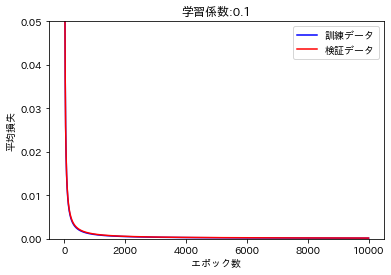

In [26]:
#ロジスティック回帰のテスト
np.random.seed(0)
X_train, y_train, X_val, y_val, train_tags, val_tags = split_dataset(Miz_t, HM, n_split=4)
mnl_ = MultiNomialLogisticRegression(X_train, y_train, X_val, y_val)
mnl_.train(X_train, y_train, X_val, y_val, max_epochs=1 * 10 ** 4, lr=1e-1)
print('訓練データ予測結果:')
mnl_.predict_val(X_train, y_train, order=train_tags, x_labels=miz_targets, y_labels=common_words)
print('検証データ予測結果:')
mnl_.predict_val(X_val, y_val, order=val_tags, x_labels=miz_targets, y_labels=common_words)
#mnl_.predict_val(X_val, y_val)
mnl_.plot_loss(ylim=0.05)